# Introduction to Visualizations in R (ggplot2)

While Python is my preferred language to do most thing, there are several very impressive capabilities that R brings to the table. R far surpasses anything that Python libraries can offer for statistical, linear, and time-series modeling. By most standards, R also has a superior plotting capability over Python. Most graphics you will see in academic research will come from R. Thus, a common workflow will be to use Python for your data wrangling needs, then imporing simple csv files in R for analysis and plotting.

Today we will learn the basics of ggplot2 and the idea of the "Grammar of Graphics." Matplotlib is widely viewed as cumbersome, unintuitive, and difficult to use. On the contrary, most view ggplot2 as more intuitive and easy to learn/remember. That being said, ggplot2 is still a massive library with capabilities that can take a long time to master. Our focus will be on the basic structure as well as some basic plotting features that you can expect to use.

In [1]:
library(ggplot2)

In [2]:
#Let's open our trusty students data set
students = read.csv('students.csv')

In [3]:
head(students)

student_id,first,last,gender,class,major,gpa
5a397209-3782-4764-a285-10fae807ee71,Janis,Brown,Female,Junior,Economics,3.12
e26c3d69-3c74-49b6-81d7-47232787fad9,Timothy,Bishop,Male,Sophomore,Economics,3.48
975c1581-5ba2-430c-a3d1-01ce03bd83f9,Elizabeth,Owens,Female,Freshman,Finance,3.40
6081f91d-365c-46ce-ad1b-38af120781d9,Edward,Pearson,Male,Freshman,Math,3.84
84cec8f4-0b64-44ce-a628-c0eb73f6ca6f,Lisa,Gonzalez,Female,Junior,Finance,4.00
6c849c3e-e640-4bba-a86a-4323fd513b90,Alphonse,Allen,Male,Freshman,Engineering,2.99


One of the most used plots in visualizing data is the histogram.

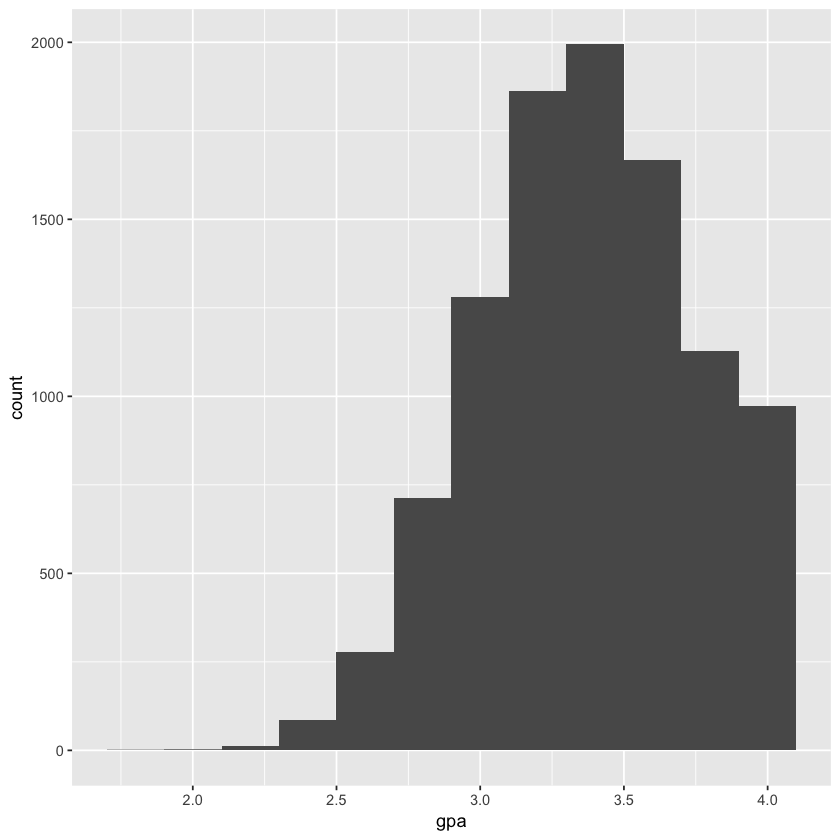

In [4]:
ggplot(students, aes(x=gpa)) + geom_histogram(binwidth=.2)

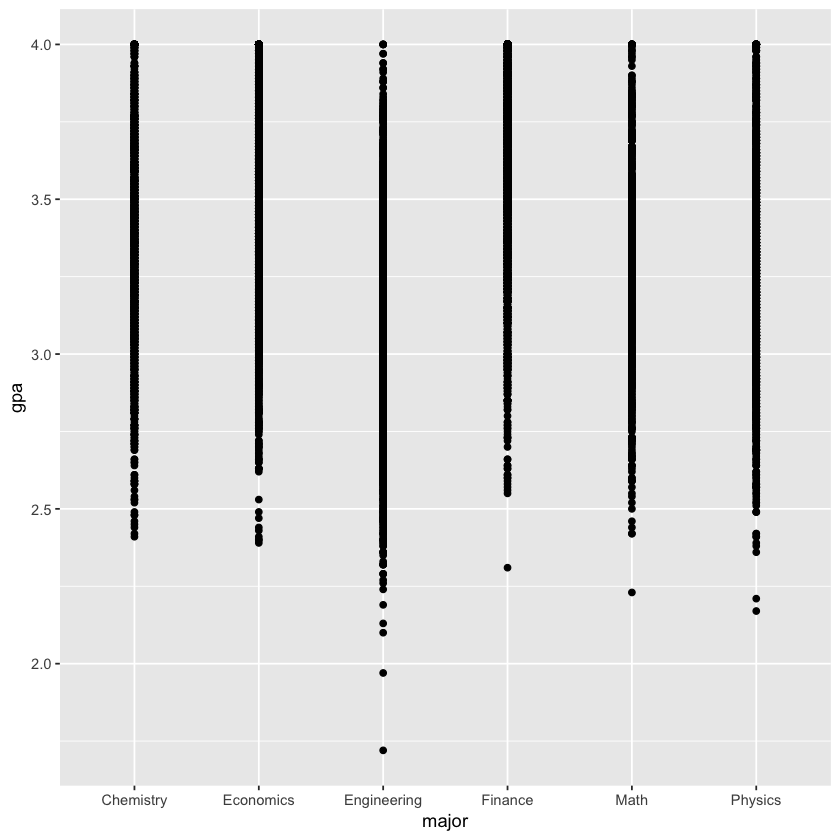

In [5]:
ggplot(students, aes(x=major, y=gpa)) + geom_point()

In [6]:
agg <- aggregate(students$gpa, by = list(Major=students$major), FUN=mean, data=students)

In [7]:
agg

Major,x
Chemistry,3.359151
Economics,3.487805
Engineering,3.106283
Finance,3.614967
Math,3.300452
Physics,3.295663


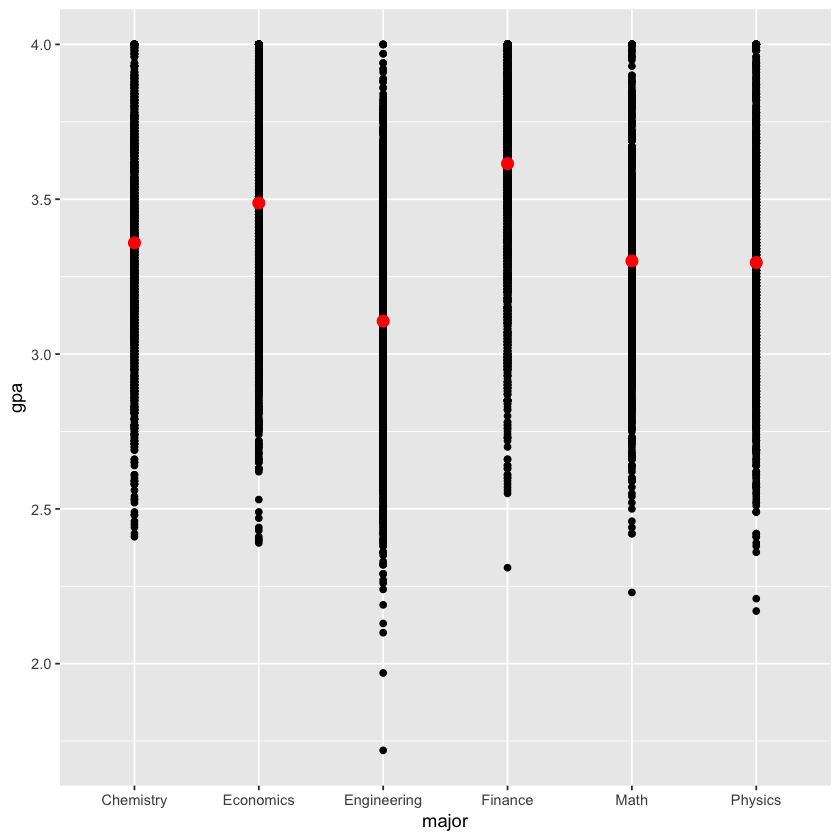

In [8]:
ggplot(students) + 
    geom_point(aes(x=major, y=gpa)) + 
    geom_point(data=agg, aes(x=Major, y=x), colour = 'red', size=3) 

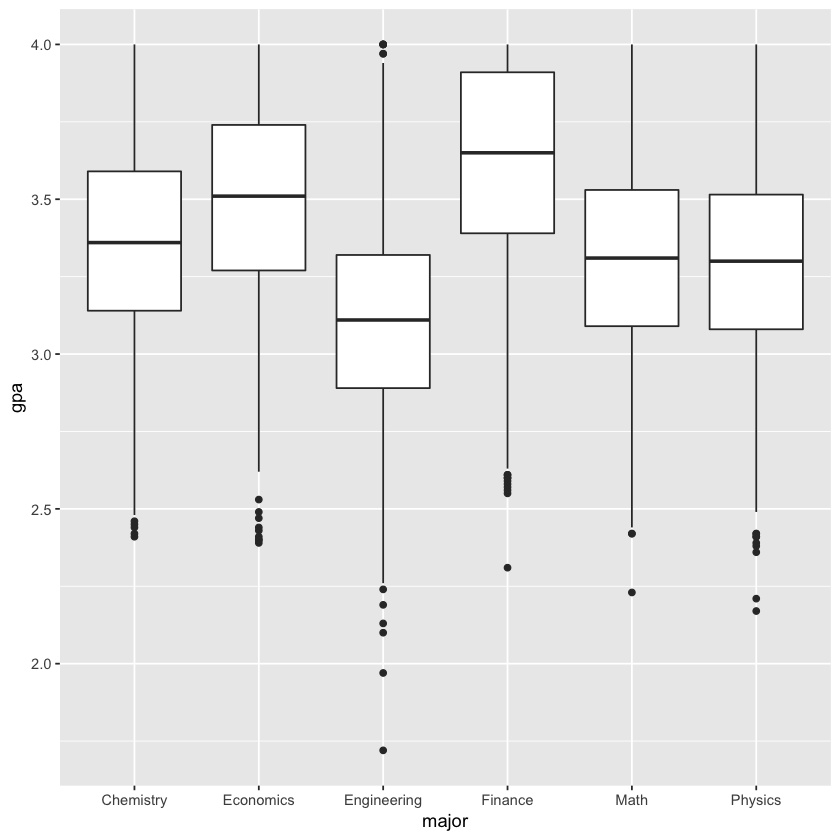

In [9]:
ggplot(students) + 
    geom_boxplot(aes(x=major, y=gpa))

In [20]:
data(mtcars)

head(mtcars)

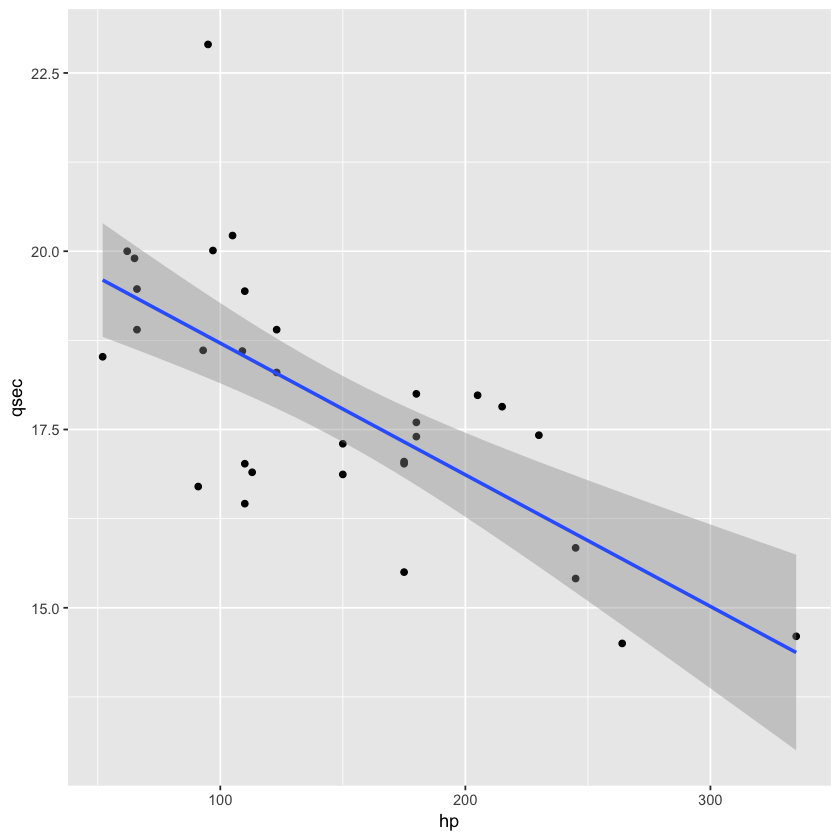

In [11]:
ggplot(data=mtcars, aes(hp, qsec)) + 
    geom_point() +
    geom_smooth(method=lm)
#loess regression non-parametric regression, nearest neighbor models (look at whats nearest to you) 

In [21]:
cor(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.0000000,-0.8521620,-0.8475514,-0.7761684,0.68117191,-0.8676594,0.41868403,0.6640389,0.59983243,0.4802848,-0.55092507
cyl,-0.8521620,1.0000000,0.9020329,0.8324475,-0.69993811,0.7824958,-0.59124207,-0.8108118,-0.52260705,-0.4926866,0.52698829
disp,-0.8475514,0.9020329,1.0000000,0.7909486,-0.71021393,0.8879799,-0.43369788,-0.7104159,-0.59122704,-0.5555692,0.39497686
hp,-0.7761684,0.8324475,0.7909486,1.0000000,-0.44875912,0.6587479,-0.70822339,-0.7230967,-0.24320426,-0.1257043,0.74981247
drat,0.6811719,-0.6999381,-0.7102139,-0.4487591,1.00000000,-0.7124406,0.09120476,0.4402785,0.71271113,0.6996101,-0.09078980
wt,-0.8676594,0.7824958,0.8879799,0.6587479,-0.71244065,1.0000000,-0.17471588,-0.5549157,-0.69249526,-0.5832870,0.42760594
qsec,0.4186840,-0.5912421,-0.4336979,-0.7082234,0.09120476,-0.1747159,1.00000000,0.7445354,-0.22986086,-0.2126822,-0.65624923
vs,0.6640389,-0.8108118,-0.7104159,-0.7230967,0.44027846,-0.5549157,0.74453544,1.0000000,0.16834512,0.2060233,-0.56960714
am,0.5998324,-0.5226070,-0.5912270,-0.2432043,0.71271113,-0.6924953,-0.22986086,0.1683451,1.00000000,0.7940588,0.05753435
gear,0.4802848,-0.4926866,-0.5555692,-0.1257043,0.69961013,-0.5832870,-0.21268223,0.2060233,0.79405876,1.0000000,0.27407284


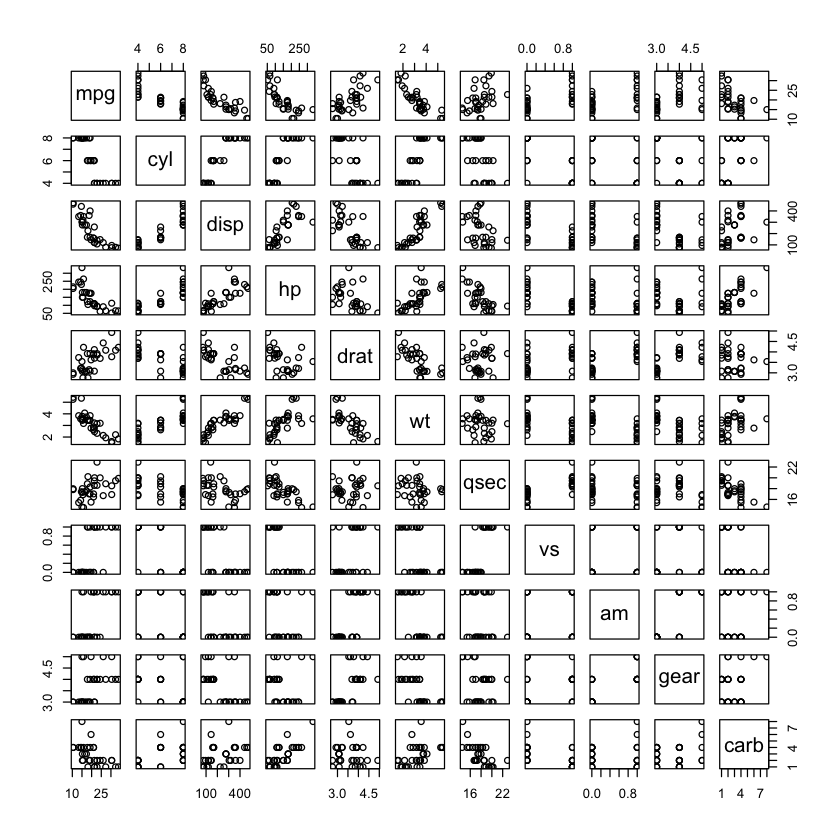

In [12]:
pairs(mtcars)

In [22]:
data(iris)

In [29]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [30]:
avgs <- aggregate(x=iris[,1:4], by=list(Species=iris$Species), FUN=mean)

In [31]:
avgs

Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


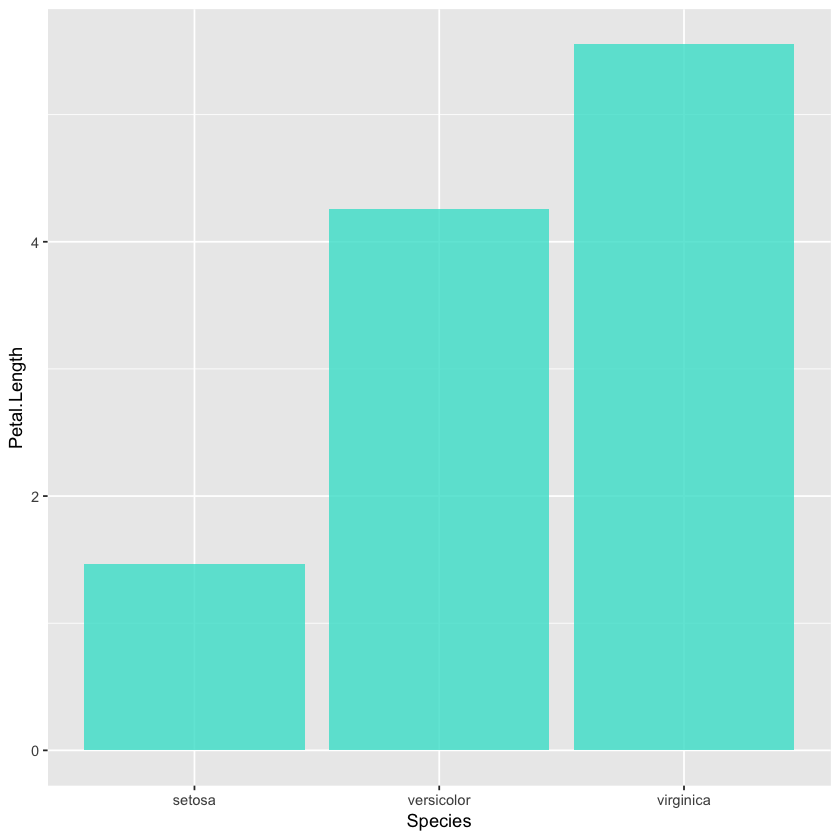

In [39]:
#p.length
ggplot(avgs, aes(x=Species, y=Petal.Length)) + 
    geom_bar(stat='identity', fill='turquoise', alpha=.8)

In [45]:

s.len <- ggplot(avgs, aes(x=Species, y=Sepal.Length)) + 
    geom_bar(stat='identity', fill='#d60000') +
    labs(title='asdf', x='qwer', y='zxv')

p.length <- ggplot(avgs, aes(x=Species, y=Petal.Length)) + 
    geom_bar(stat='identity', fill='#797c77') + 
    ggtitle('This is a title') + xlab('This is x') + ylab('This is y')

p.width <- ggplot(avgs, aes(x=Species, y=Petal.Width)) + 
    geom_bar(stat='identity', fill='#438e88') + 
    ggtitle('This is a title') + theme(plot.title = element_text(hjust = 0.5)) + xlab('This is x') + ylab('This is y')



In [46]:
install.packages("gridExtra")
library("gridExtra")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


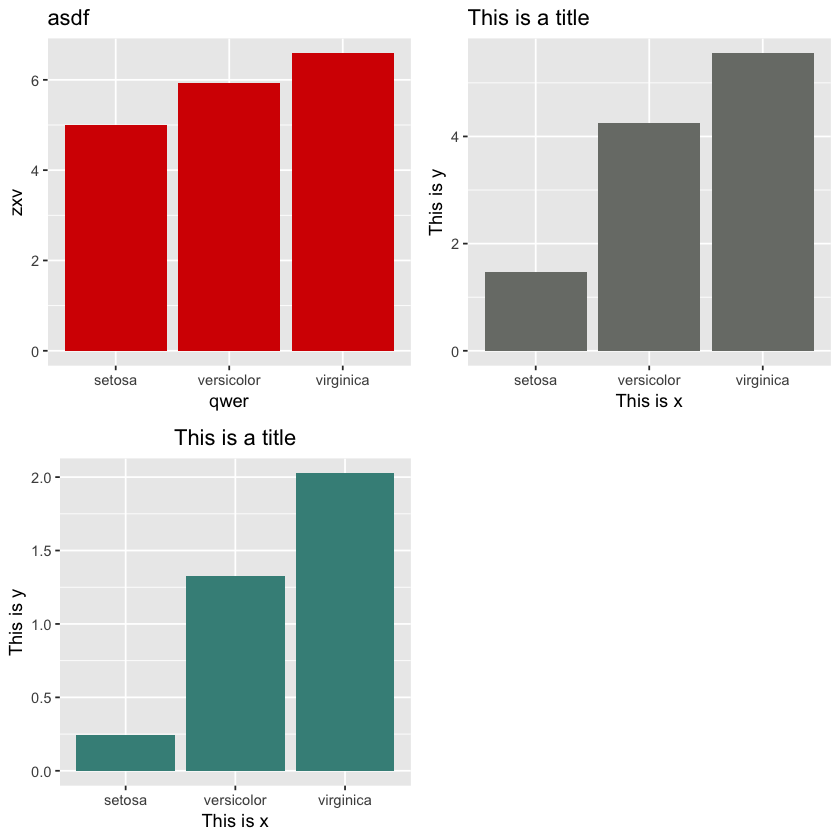

In [48]:
grid.arrange(s.len, p.length, p.width, ncol=2, nrow=2, widths=c(8,8), heights=c(4,4))